### What if I had a longer canyon instead of a chubby one?

Reviewer 2 form JPO asked about the impact of having a Barkley like cancyon, which is chubby intead of long unlike many shelf canyons.

I ran experiments with a longer canyon, same width and radius of curvature.

Run01:
    
L = 12800.0 m, vs 6400.0 m from Barkley-like run

R = 5000.0 m

Wm = 24432.4 m, Width at shelf break

W = 22044.8 m, mid-length width at rim depth

Ws = 13756.1 m, mid-length width at shelf-break isobath

Hs = 150.0 m,  Shelf break depth

s = 0.005 m, shelf slope 

Hh = 97.5 m, head depth

Hr = 132.0 m, rim depth at DnS

No = 5.5E-3 s$^{-1}$, Initial stratification at shelf-break depth

f = 9.66E-5 s$^{-1}$, Coriois parameter 

U = 0.344 ms$^{-1}$,  incoming velocity base case, m/s (from model)



In [18]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gspec
%matplotlib inline
from netCDF4 import Dataset
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys
import warnings
warnings.filterwarnings("ignore")
import xarray as xr
import canyon_tools.readout_tools as rout 
import canyon_tools.metrics_tools as mpt

In [40]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [48]:
GridBar='/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
GridBarOut = Dataset(GridBar)
gridBar = xr.open_dataset(GridBar)

GridNoC='/data/kramosmu/results/TracerExperiments/CNTDIFF/run68/gridGlob.nc'
GridOutNoC = Dataset(GridNoC)

StateBar='/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/stateGlob.nc'
StateBarOut = Dataset(StateBar)
staBar = xr.open_dataset(StateBar)

PtracBar='/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/ptracersGlob.nc'
PtracBarOut = Dataset(PtracBar)
ptrBar = xr.open_dataset(PtracBar)

GridLon='/data/kramosmu/results/TracerExperiments/LONGER_CNY/run01/gridGlob.nc'
GridLonOut = Dataset(GridLon)

StateLon='/data/kramosmu/results/TracerExperiments/LONGER_CNY/run01/stateGlob.nc'
StateLonOut = Dataset(StateLon)
staLon = xr.open_dataset(StateLon)

PtracLon='/data/kramosmu/results/TracerExperiments/LONGER_CNY/run01/ptracersGlob.nc'
PtracLonOut = Dataset(PtracLon)
ptrLon = xr.open_dataset(PtracLon)

# Grid variables
nx = 616
ny = 360
nz = 90
nt = 19 # t dimension size 
time = StateBarOut.variables['T']

In [5]:
# Constants and scales

L_lon = 21800.0 # canyon length long
L_bar = 6400.5 # canyon length Barkley-like
R = 5000.0 # Upstream radius of curvature
g = 9.81 # accel. gravity
Hs = 147.5 # Shelf break depth
s = 0.005 # shelf slope 
W = 22044 # mid-length width at rim depth
Wr = 13756.1 # width at lid-length at shelf break isobath
Hh= 97.5 # head depth
Hr = 132.0 # rim depth at DnS
# NOTE: The default values of all functions correspond to the base case

def Dh(f=9.66E-4,L=6400.0,N=5.5E-3):
    '''Vertical scale Dh'''
    return((f*L)/(N))
    
def Ro(U=0.37,f=9.66E-4,R=5000.0):
    '''Rossby number using radius of curvature as length scale'''
    return(U/(f*R))

def F(Ro):
    '''Function that estimates the ability of the flow to follow isobaths'''
    return(Ro/(0.9+Ro))

def Bu(N=5.5E-3,f=9.66E-5,W=8300,Hs=147.5):
    '''Burger number'''
    return(N*Hs/(f*W))

def RossbyRad(N=5.5E-3,Hs=150.0,f=9.66E-4):
    '''1st Rossby radius of deformation'''
    return(N*Hs/f)

### Tracer concentration

Text(0.5,1,'depth = -147.5 m')

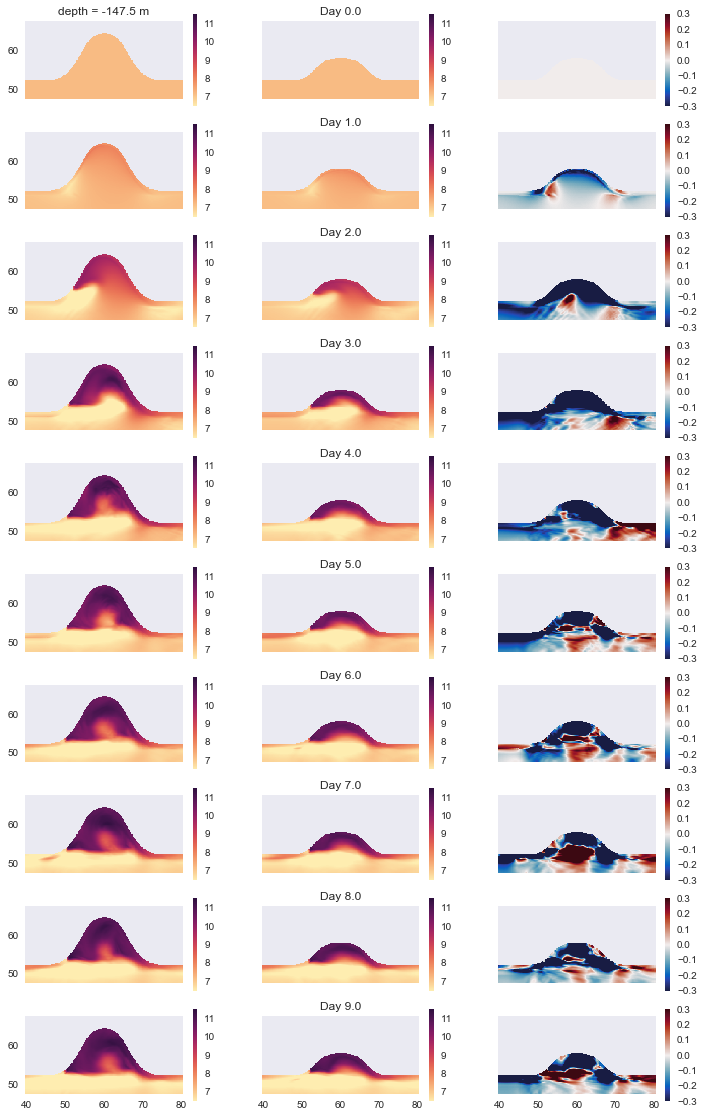

In [44]:
y_slice = slice(200,300)
x_slice = slice(80,280)
zlev = 29

fig,ax = plt.subplots(10,3, figsize=(12,20), sharey=True, sharex = True)

for ii in range(10):
    
    tt = ii*2
    
    long_tr1 = np.ma.masked_equal(ptrLon.Tr1.isel(Y=y_slice, X=x_slice, Z=zlev, T=tt), 0.0)
    bark_tr1 = np.ma.masked_equal(ptrBar.Tr1.isel(Y=y_slice, X=x_slice, Z=zlev, T=tt), 0.0)
    X = ptrBar.X.isel(X=x_slice)/1000
    Y = ptrBar.Y.isel(Y=y_slice)/1000
    
    pc0 = ax[ii,0].pcolor(X,Y,long_tr1, vmax=11.5, vmin=6.5, cmap=cmo.cm.matter)
    plt.colorbar(pc0
                 , ax=ax[ii,0])
    pc1 = ax[ii,1].pcolor(X,Y,bark_tr1, vmax=11.5, vmin=6.5, cmap=cmo.cm.matter)
    plt.colorbar(pc1, ax=ax[ii,1])
    pc2 = ax[ii,2].pcolor(X,Y,long_tr1-bark_tr1, vmax=0.3, vmin=-0.3, cmap=cmo.cm.balance)
    plt.colorbar(pc2, ax=ax[ii,2])
    
    ax[ii,1].set_title('Day %0.1f' %(tt/2.0))
    ax[ii,0].set_aspect(1)
    ax[ii,1].set_aspect(1)
    ax[ii,2].set_aspect(1)
    
ax[0,0].set_title('depth = %1.1f m' %(ptrLon.Z.isel(Z=zlev)))

Text(0.5,1,'depth = -112.5 m')

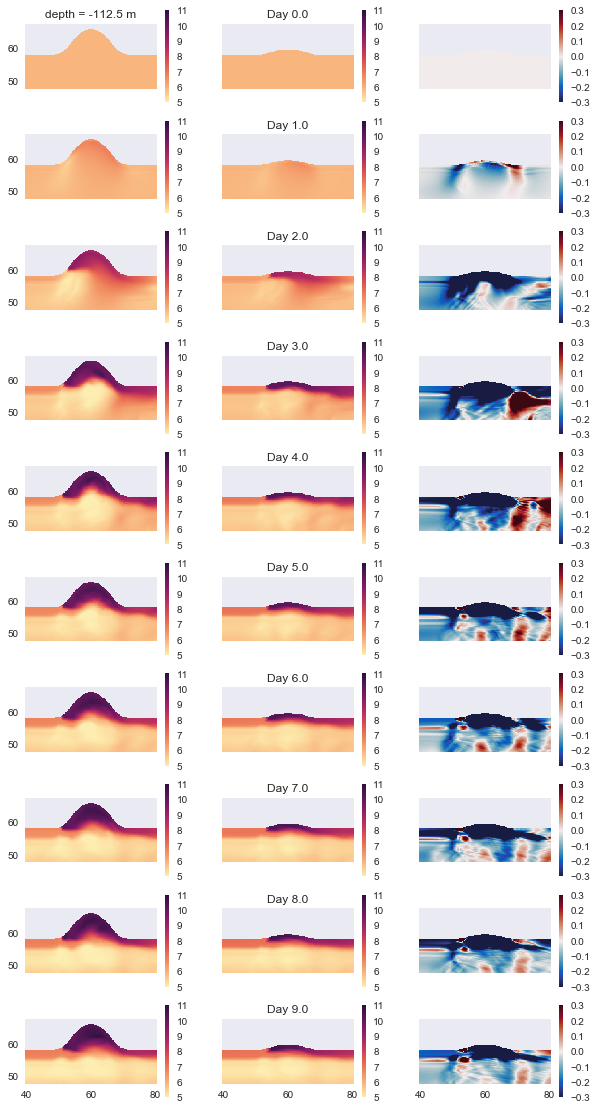

In [47]:
y_slice = slice(200,300)
x_slice = slice(80,280)
zlev = 22

fig,ax = plt.subplots(10,3, figsize=(10,20), sharey=True, sharex = True)

for ii in range(10):
    
    tt = ii*2
    
    long_tr1 = np.ma.masked_equal(ptrLon.Tr1.isel(Y=y_slice, X=x_slice, Z=zlev, T=tt), 0.0)
    bark_tr1 = np.ma.masked_equal(ptrBar.Tr1.isel(Y=y_slice, X=x_slice, Z=zlev, T=tt), 0.0)
    X = ptrBar.X.isel(X=x_slice)/1000
    Y = ptrBar.Y.isel(Y=y_slice)/1000
    
    pc0 = ax[ii,0].pcolor(X,Y,long_tr1, vmax=11, vmin=5.0, cmap=cmo.cm.matter)
    plt.colorbar(pc0
                 , ax=ax[ii,0])
    pc1 = ax[ii,1].pcolor(X,Y,bark_tr1, vmax=11, vmin=5.0, cmap=cmo.cm.matter)
    plt.colorbar(pc1, ax=ax[ii,1])
    pc2 = ax[ii,2].pcolor(X,Y,long_tr1-bark_tr1, vmax=0.3, vmin=-0.3, cmap=cmo.cm.balance)
    plt.colorbar(pc2, ax=ax[ii,2])
    
    ax[ii,1].set_title('Day %0.1f' %(tt/2.0))
    ax[ii,0].set_aspect(1)
    ax[ii,1].set_aspect(1)
    ax[ii,2].set_aspect(1)
    
ax[0,0].set_title('depth = %1.1f m' %(ptrLon.Z.isel(Z=zlev)))

#### Cross-shelf section, tracer concentration

Text(0.5,1,'alongshore dist = 62.6 km')

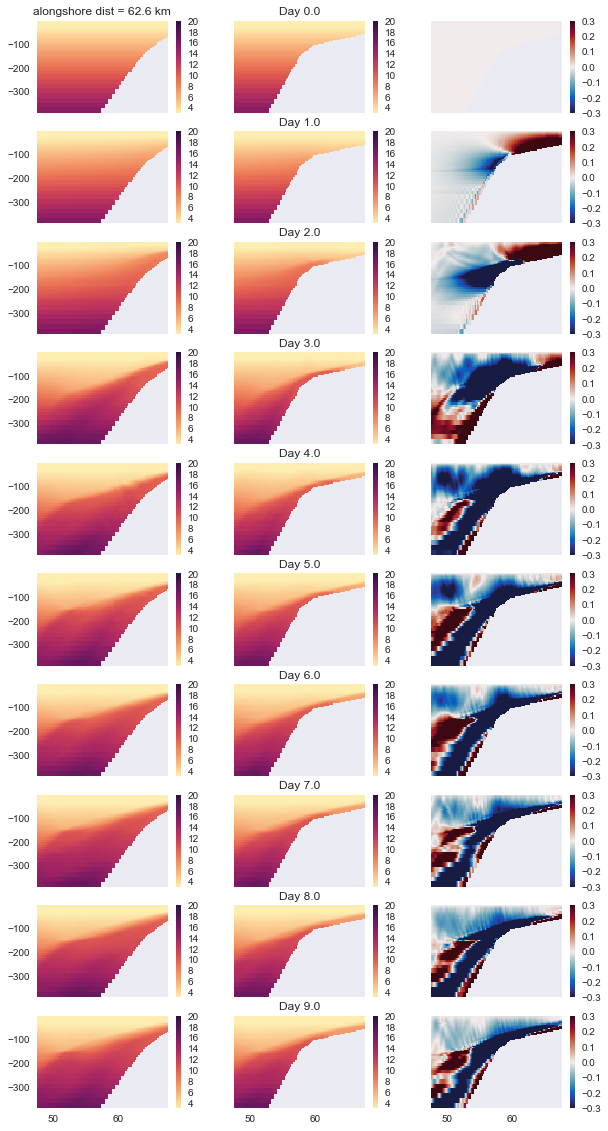

In [62]:
y_slice = slice(200,300)
x_ind = 200
z_slice = slice(0,50)

fig,ax = plt.subplots(10,3, figsize=(10,20), sharey=True, sharex = True)

for ii in range(10):
    
    tt = ii*2
    
    long_tr1 = np.ma.masked_equal(ptrLon.Tr1.isel(Y=y_slice, X=x_ind, Z=z_slice, T=tt), 0.0)
    bark_tr1 = np.ma.masked_equal(ptrBar.Tr1.isel(Y=y_slice, X=x_ind, Z=z_slice, T=tt), 0.0)
    X = ptrBar.X.isel(X=x_ind)/1000
    Y = ptrBar.Y.isel(Y=y_slice)/1000
    Z = ptrBar.Z.isel(Z=z_slice)
    
    pc0 = ax[ii,0].pcolor(Y,Z,long_tr1, vmax=20, vmin=3.0, cmap=cmo.cm.matter)
    plt.colorbar(pc0, ax=ax[ii,0])
    pc1 = ax[ii,1].pcolor(Y,Z,bark_tr1, vmax=20, vmin=3.0, cmap=cmo.cm.matter)
    plt.colorbar(pc1, ax=ax[ii,1])
    pc2 = ax[ii,2].pcolor(Y,Z,long_tr1-bark_tr1, vmax=0.3, vmin=-0.3, cmap=cmo.cm.balance)
    plt.colorbar(pc2, ax=ax[ii,2])
    
    ax[ii,1].set_title('Day %0.1f' %(tt/2.0))
    
ax[0,0].set_title('alongshore dist = %1.1f km' %(ptrLon.X.isel(X=x_ind)/1000))

In [59]:
np.shape(long_tr1)

(89, 100, 200)

### Vertical velocity

Text(0.5,1,'depth = -145.0 m')

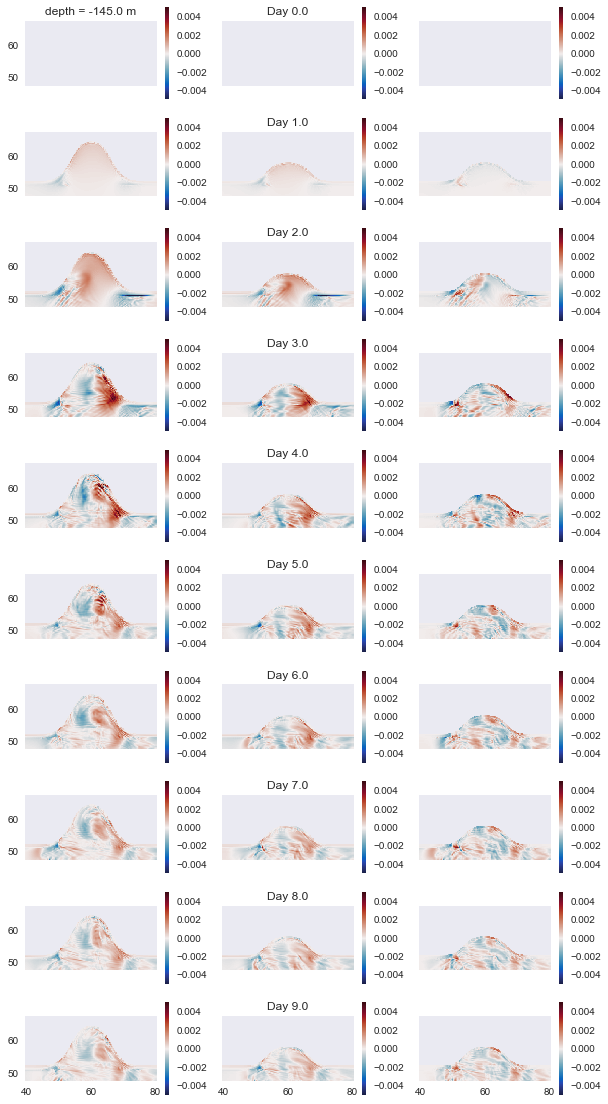

In [53]:
y_slice = slice(200,300)
x_slice = slice(80,280)
zlev = 29

fig,ax = plt.subplots(10,3, figsize=(10,20), sharey=True, sharex = True)

for ii in range(10):
    
    tt = ii*2
    
    long_w = np.ma.masked_equal(staLon.W.isel(Y=y_slice, X=x_slice, Zl=zlev, T=tt), 0.0)
    bark_w = np.ma.masked_equal(staBar.W.isel(Y=y_slice, X=x_slice, Zl=zlev, T=tt), 0.0)
    X = ptrBar.X.isel(X=x_slice)/1000
    Y = ptrBar.Y.isel(Y=y_slice)/1000
    
    pc0 = ax[ii,0].pcolor(X,Y,long_w, vmax=0.005, vmin=-0.005, cmap=cmo.cm.balance)
    plt.colorbar(pc0
                 , ax=ax[ii,0])
    pc1 = ax[ii,1].pcolor(X,Y,bark_w, vmax=0.005, vmin=-0.005, cmap=cmo.cm.balance)
    plt.colorbar(pc1, ax=ax[ii,1])
    pc2 = ax[ii,2].pcolor(X,Y,long_w-bark_w, vmax=0.005, vmin=-0.005, cmap=cmo.cm.balance)
    plt.colorbar(pc2, ax=ax[ii,2])
    
    ax[ii,1].set_title('Day %0.1f' %(tt/2.0))
    ax[ii,0].set_aspect(1)
    ax[ii,1].set_aspect(1)
    ax[ii,2].set_aspect(1)
    
ax[0,0].set_title('depth = %1.1f m' %(staLon.Zl.isel(Zl=zlev)))

Text(0.5,1,'depth = -155.0 m')

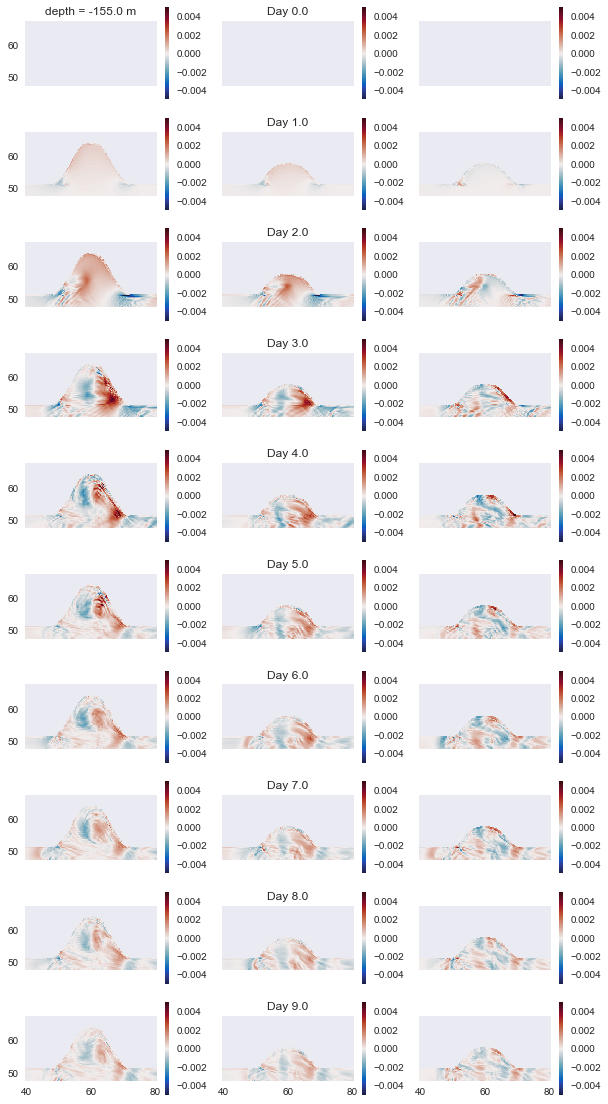

In [54]:
y_slice = slice(200,300)
x_slice = slice(80,280)
zlev = 31

fig,ax = plt.subplots(10,3, figsize=(10,20), sharey=True, sharex = True)

for ii in range(10):
    
    tt = ii*2
    
    long_w = np.ma.masked_equal(staLon.W.isel(Y=y_slice, X=x_slice, Zl=zlev, T=tt), 0.0)
    bark_w = np.ma.masked_equal(staBar.W.isel(Y=y_slice, X=x_slice, Zl=zlev, T=tt), 0.0)
    X = ptrBar.X.isel(X=x_slice)/1000
    Y = ptrBar.Y.isel(Y=y_slice)/1000
    
    pc0 = ax[ii,0].pcolor(X,Y,long_w, vmax=0.005, vmin=-0.005, cmap=cmo.cm.balance)
    plt.colorbar(pc0
                 , ax=ax[ii,0])
    pc1 = ax[ii,1].pcolor(X,Y,bark_w, vmax=0.005, vmin=-0.005, cmap=cmo.cm.balance)
    plt.colorbar(pc1, ax=ax[ii,1])
    pc2 = ax[ii,2].pcolor(X,Y,long_w-bark_w, vmax=0.005, vmin=-0.005, cmap=cmo.cm.balance)
    plt.colorbar(pc2, ax=ax[ii,2])
    
    ax[ii,1].set_title('Day %0.1f' %(tt/2.0))
    ax[ii,0].set_aspect(1)
    ax[ii,1].set_aspect(1)
    ax[ii,2].set_aspect(1)
    
ax[0,0].set_title('depth = %1.1f m' %(staLon.Zl.isel(Zl=zlev)))


Text(0.5,1,'depth = -165.0 m')

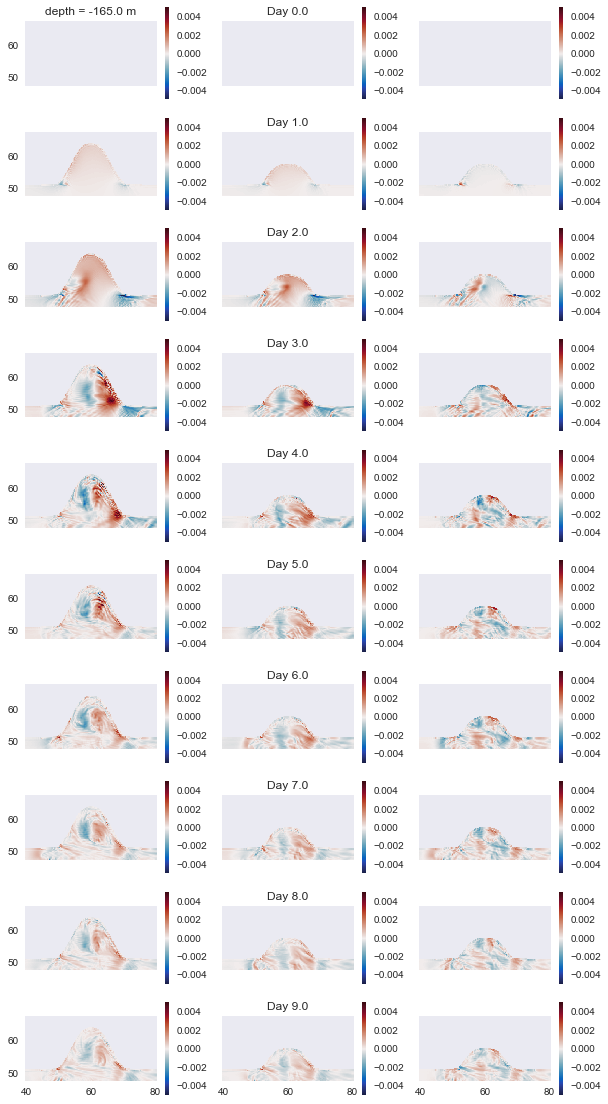

In [55]:
y_slice = slice(200,300)
x_slice = slice(80,280)
zlev = 33

fig,ax = plt.subplots(10,3, figsize=(10,20), sharey=True, sharex = True)

for ii in range(10):
    
    tt = ii*2
    
    long_w = np.ma.masked_equal(staLon.W.isel(Y=y_slice, X=x_slice, Zl=zlev, T=tt), 0.0)
    bark_w = np.ma.masked_equal(staBar.W.isel(Y=y_slice, X=x_slice, Zl=zlev, T=tt), 0.0)
    X = ptrBar.X.isel(X=x_slice)/1000
    Y = ptrBar.Y.isel(Y=y_slice)/1000
    
    pc0 = ax[ii,0].pcolor(X,Y,long_w, vmax=0.005, vmin=-0.005, cmap=cmo.cm.balance)
    plt.colorbar(pc0
                 , ax=ax[ii,0])
    pc1 = ax[ii,1].pcolor(X,Y,bark_w, vmax=0.005, vmin=-0.005, cmap=cmo.cm.balance)
    plt.colorbar(pc1, ax=ax[ii,1])
    pc2 = ax[ii,2].pcolor(X,Y,long_w-bark_w, vmax=0.005, vmin=-0.005, cmap=cmo.cm.balance)
    plt.colorbar(pc2, ax=ax[ii,2])
    
    ax[ii,1].set_title('Day %0.1f' %(tt/2.0))
    ax[ii,0].set_aspect(1)
    ax[ii,1].set_aspect(1)
    ax[ii,2].set_aspect(1)
    
ax[0,0].set_title('depth = %1.1f m' %(staLon.Zl.isel(Zl=zlev)))

### Alongshore velocities

Text(0.5,1,'alongshore dist = 48.4 km')

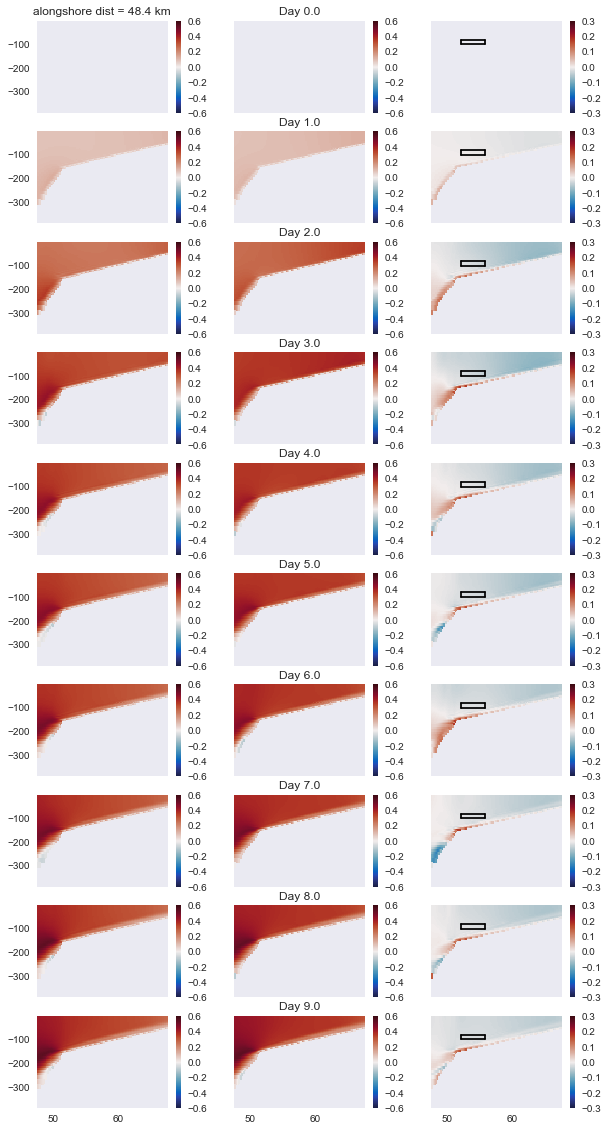

In [80]:
y_slice = slice(200,300)
x_ind = 110
z_slice = slice(0,50)

# Box where U incoming is calclulated
box_Uin_z = slice(16,21)
box_Uin_y = slice(230,251)
nox_Uin_x = 110

fig,ax = plt.subplots(10,3, figsize=(10,20), sharey=True, sharex = True)

for ii in range(10):
    
    tt = ii*2
    
    long_u = np.ma.masked_equal(staLon.U.isel(Y=y_slice, Xp1=x_ind, Z=z_slice, T=tt), 0.0)
    bark_u = np.ma.masked_equal(staBar.U.isel(Y=y_slice, Xp1=x_ind, Z=z_slice, T=tt), 0.0)
    X = staBar.X.isel(X=x_ind)/1000
    Y = staBar.Y.isel(Y=y_slice)/1000
    Z = staBar.Z.isel(Z=z_slice)
    
    pc0 = ax[ii,0].pcolor(Y,Z,long_u, vmax=0.6, vmin=-0.6, cmap=cmo.cm.balance)
    plt.colorbar(pc0, ax=ax[ii,0])
    pc1 = ax[ii,1].pcolor(Y,Z,bark_u, vmax=0.6, vmin=-0.6, cmap=cmo.cm.balance)
    plt.colorbar(pc1, ax=ax[ii,1])
    pc2 = ax[ii,2].pcolor(Y,Z,long_u-bark_u, vmax=0.3, vmin=-0.3, cmap=cmo.cm.balance)
    plt.colorbar(pc2, ax=ax[ii,2])
    
    y_ubox = staBar.Y.isel(Y=box_Uin_y).data/1000
    z_ubox = staBar.Z.isel(Z=box_Uin_z).data
    ax[ii,2].plot(y_ubox[0]*np.ones(len(z_ubox)), z_ubox,'-k')
    ax[ii,2].plot(y_ubox[-1]*np.ones(len(z_ubox)), z_ubox,'-k')
    ax[ii,2].plot(y_ubox, z_ubox[-1]*np.ones(len(y_ubox)),'-k')
    ax[ii,2].plot(y_ubox, z_ubox[0]*np.ones(len(y_ubox)),'-k')
    
    ax[ii,1].set_title('Day %0.1f' %(tt/2.0))
    
ax[0,0].set_title('alongshore dist = %1.1f km' %(ptrLon.X.isel(X=x_ind)/1000))

Text(0.5,1,'alongshore dist = 60.1 km')

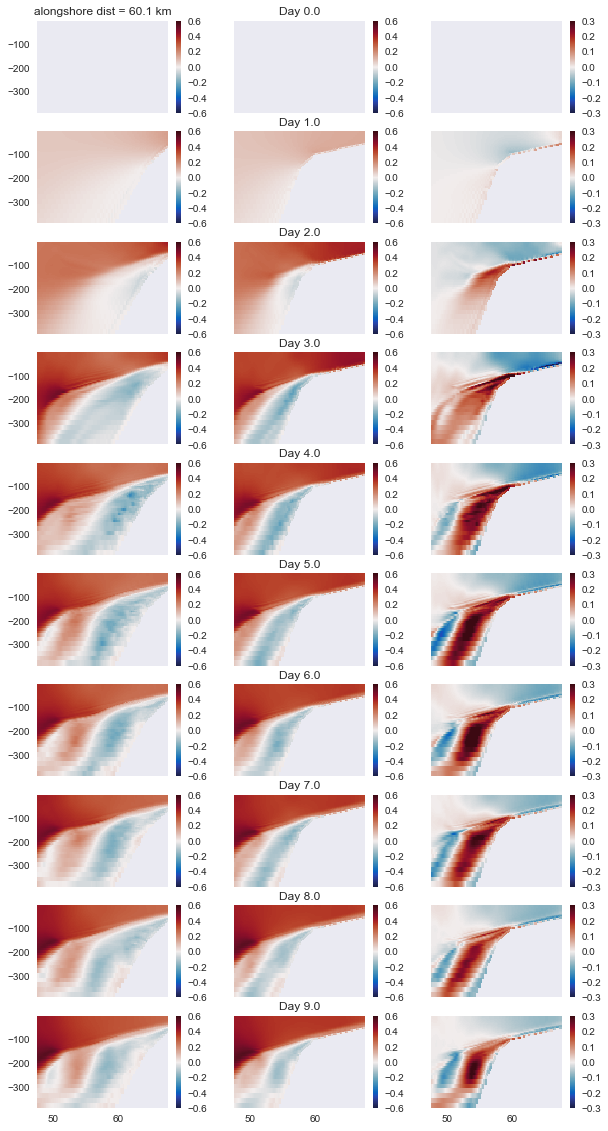

In [81]:
y_slice = slice(200,300)
x_ind = 180
z_slice = slice(0,50)


fig,ax = plt.subplots(10,3, figsize=(10,20), sharey=True, sharex = True)

for ii in range(10):
    
    tt = ii*2
    
    long_u = np.ma.masked_equal(staLon.U.isel(Y=y_slice, Xp1=x_ind, Z=z_slice, T=tt), 0.0)
    bark_u = np.ma.masked_equal(staBar.U.isel(Y=y_slice, Xp1=x_ind, Z=z_slice, T=tt), 0.0)
    X = staBar.X.isel(X=x_ind)/1000
    Y = staBar.Y.isel(Y=y_slice)/1000
    Z = staBar.Z.isel(Z=z_slice)
    
    pc0 = ax[ii,0].pcolor(Y,Z,long_u, vmax=0.6, vmin=-0.6, cmap=cmo.cm.balance)
    plt.colorbar(pc0, ax=ax[ii,0])
    pc1 = ax[ii,1].pcolor(Y,Z,bark_u, vmax=0.6, vmin=-0.6, cmap=cmo.cm.balance)
    plt.colorbar(pc1, ax=ax[ii,1])
    pc2 = ax[ii,2].pcolor(Y,Z,long_u-bark_u, vmax=0.3, vmin=-0.3, cmap=cmo.cm.balance)
    plt.colorbar(pc2, ax=ax[ii,2])
      
    ax[ii,1].set_title('Day %0.1f' %(tt/2.0))
    
ax[0,0].set_title('alongshore dist = %1.1f km' %(ptrLon.X.isel(X=x_ind)/1000))